In [ ]:
# Synthèse par groupe

# Analyse jeu de données, s'intéresser à la police de Chicago
# S'intéresser à la structure du jeu de données et à l'algorithme

# Lire les papiers + Description de statistiques

In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# Importer le jeu de données
df = pd.read_csv("Strategic_Subject_List.csv")

df.head()

/nfs/opt/linux/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SSL SCORE,PREDICTOR RAT AGE AT LATEST ARREST,PREDICTOR RAT VICTIM SHOOTING INCIDENTS,PREDICTOR RAT VICTIM BATTERY OR ASSAULT,PREDICTOR RAT ARRESTS VIOLENT OFFENSES,PREDICTOR RAT GANG AFFILIATION,PREDICTOR RAT NARCOTIC ARRESTS,PREDICTOR RAT TREND IN CRIMINAL ACTIVITY,PREDICTOR RAT UUW ARRESTS,SEX CODE CD,...,RAW_HEAT_SCORE,STATUS I,PRE RAW HEAT SCORE,TRAP FLAGS,SSL FLAGS,LATITUDE,LONGITUDE,CENSUS TRACT,COMMUNITY AREA,LOCATION
0,500,20-30,0,1,4,1,1,1.0,1,M,...,0.14196,Y,14196,NaN,24.0,NaN,NaN,NaN,,NaN
1,500,20-30,0,9,1,1,0,1.0,0,M,...,0.14511,Y,14511,NaN,8.0,NaN,NaN,NaN,,NaN
2,500,less than 20,1,2,1,1,3,1.0,0,M,...,0.12982,Y,12982,NaN,8.0,NaN,NaN,NaN,,NaN
3,500,less than 20,1,1,4,1,0,1.6,1,M,...,0.13110,Y,13110,NaN,NaN,NaN,NaN,NaN,,NaN
4,500,less than 20,0,0,5,0,0,1.3,3,M,...,0.12874,Y,12874,NaN,NaN,NaN,NaN,NaN,,NaN


In [106]:
lines = len(df)
columns = len(list(df[:1]))

# print(df.columns)

df['Age'] = df['PREDICTOR RAT AGE AT LATEST ARREST']

dic={
    "less than 20": 0,
    "20-30": 1,
    "30-40": 2,
    "40-50": 3,
    "50-60": 4,
    "60-70": 6,
    "70-80": 7,
}

df['AGE'] = df['AGE GROUP'].map(dic)

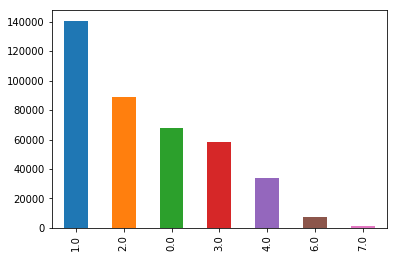

In [108]:
df['AGE'].value_counts().plot(kind='bar')

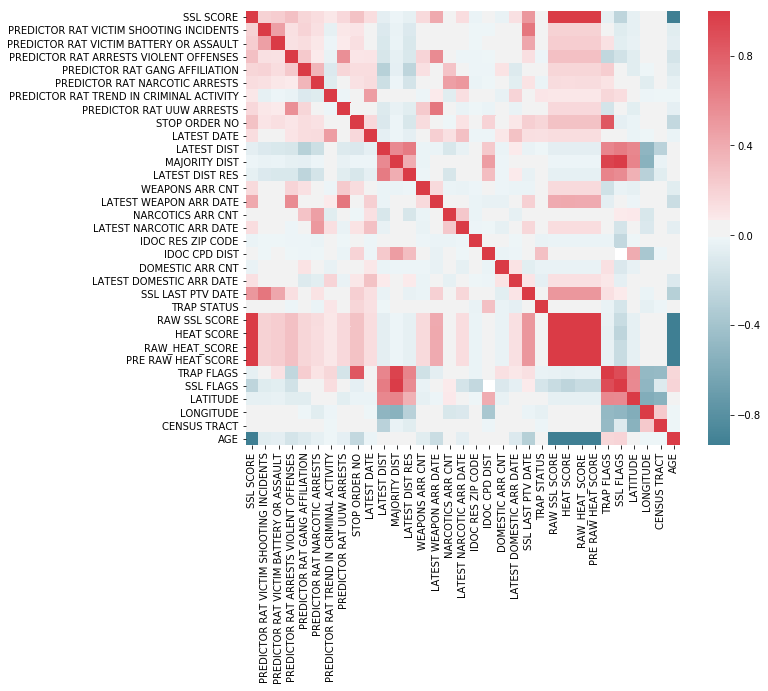

In [107]:
import seaborn as sns
from matplotlib import pyplot as pl 

f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [72]:
df2 = df.copy()

# On enlève les colonnes non utiles
df2.drop(["LATITUDE", "LONGITUDE", "CENSUS TRACT", "COMMUNITY AREA", "LOCATION"], axis=1, inplace=True)

# one-hot encoding
df2 = pd.get_dummies(df2)